# NLP Submission 
## Team WiFi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, f1_score, roc_auc_score 
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


In [4]:
train = pd.read_csv('data/TIL_NLP_train_dataset.csv')
test = pd.read_csv('data/TIL_NLP_test_dataset.csv')
train

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
...,...,...,...,...,...,...,...
7375,7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,0,1,1,0,0
7376,7376,w261297 w162756 w283853 w500021 w256905 w22079...,1,1,0,0,0
7377,7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,1,0,1,0,0
7378,7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,1,1,0,0,0


In [5]:
train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])
total = train.append(test)
total

,word_representation,outwear,top,trousers,women dresses,women skirts
0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1.0,0.0,1.0,0.0,0.0
1,w195317 w127737 w171593 w22890 w342007 w217871...,1.0,0.0,1.0,0.0,0.0
2,w247655 w270233 w261113 w337250 w366000 w37873...,0.0,1.0,1.0,0.0,0.0
3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1.0,0.0,1.0,0.0,0.0
4,w254516 w135431 w115724 w331534 w256214 w71240...,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2455,w104709 w384021 w277040 w365489 w500187 w25013...,NaN,NaN,NaN,NaN,NaN
2456,w195317 w102200 w381413 w34893 w183695 w69002 ...,NaN,NaN,NaN,NaN,NaN
2457,w373517 w347736 w159941 w34893 w39218 w223408 ...,NaN,NaN,NaN,NaN,NaN
2458,w207614 w194000 w390708 w322224 w70969 w311583...,NaN,NaN,NaN,NaN,NaN


In [6]:
total.reset_index().word_representation[0]

'w7718 w173355 w138132 w232277 w90685 w314686 w256905 w292000 w217871 w148650 w220790 w207614 w20894 w247655 w500010 w136109 w172358 w66535 w80220 w255783 w15393'

In [8]:
texts = [word for word in total['word_representation']]
texts

['w7718 w173355 w138132 w232277 w90685 w314686 w256905 w292000 w217871 w148650 w220790 w207614 w20894 w247655 w500010 w136109 w172358 w66535 w80220 w255783 w15393',
 'w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910',
 'w247655 w270233 w261113 w337250 w366000 w378735 w500012 w306830 w200253 w29840 w339655 w209018 w384021 w1867 w120979 w292000 w30585 w173688 w85858 w221983 w127234',
 'w279289 w395855 w61795 w286461 w308610 w27013 w272605 w287214 w15393 w217871 w751 w393636 w317227 w368487 w319927 w70969',
 'w254516 w135431 w115724 w331534 w256214 w71240 w356796 w326106 w34893 w175250 w217578 w186076 w349078 w26969 w241910',
 'w53495 w306061 w372126 w47982 w66980 w189406 w71392 w217871 w127234 w301260 w51947 w336335 w217871 w128523 w500123 w221983 w103141 w105773 w318673 w380347 w201668',
 'w237465 w256553 w286461 w382662 w206066 w121255 w244532 w163007 w233699 w277040 w365489 w333968 w250138',
 'w173317 w39222 w207614 

In [9]:
max([len(text.split(' ')) for text in texts])

47

In [10]:
np.argmax([len(text.split(' ')) for text in texts])

6136

In [63]:
#pre define parameters
MAX_NB_WORDS = 100
MAX_SEQUENCE_LENGTH = 47
EMBEDDING_DIM = 100

In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Input
from sklearn.model_selection import GridSearchCV

In [65]:
tokenizer = Tokenizer()   #nb_words=MAX_NB_WORDS
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
sequences

[[63,
  1451,
  107,
  911,
  67,
  18,
  66,
  83,
  3,
  292,
  530,
  14,
  165,
  55,
  288,
  434,
  848,
  1775,
  289,
  103,
  16],
 [13, 68, 104, 71, 29, 3, 1776, 217, 48, 6, 2, 401, 1008, 134, 6],
 [55,
  22,
  99,
  188,
  144,
  406,
  185,
  270,
  306,
  195,
  419,
  110,
  23,
  25,
  7,
  83,
  979,
  38,
  48,
  11,
  221],
 [166, 323, 106, 10, 141, 210, 151, 1144, 16, 3, 254, 3473, 1977, 58, 204, 70],
 [42, 127, 35, 95, 59, 56, 266, 602, 1, 495, 709, 5, 693, 2718, 6],
 [546,
  603,
  159,
  625,
  8,
  90,
  202,
  3,
  221,
  331,
  448,
  206,
  3,
  3474,
  1224,
  11,
  743,
  41,
  45,
  109,
  720],
 [32, 27, 10, 157, 831, 28, 962, 146, 547, 47, 87, 307, 9],
 [567,
  93,
  14,
  136,
  963,
  21,
  17,
  1286,
  8,
  173,
  435,
  84,
  436,
  449,
  3,
  437,
  420,
  14,
  1,
  393,
  64,
  407,
  5,
  421,
  1,
  394,
  35,
  56,
  4,
  51,
  290,
  135,
  96,
  1097,
  18],
 [26,
  78,
  496,
  91,
  10,
  30,
  923,
  924,
  854,
  15,
  304,
  29,
  4,
  

In [66]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4620 unique tokens.


In [67]:
word_index

{'w34893': 1,
 'w194870': 2,
 'w217871': 3,
 'w311583': 4,
 'w186076': 5,
 'w241910': 6,
 'w120979': 7,
 'w66980': 8,
 'w250138': 9,
 'w286461': 10,
 'w221983': 11,
 'w111248': 12,
 'w195317': 13,
 'w207614': 14,
 'w374393': 15,
 'w15393': 16,
 'w193800': 17,
 'w314686': 18,
 'w33992': 19,
 'w36882': 20,
 'w197783': 21,
 'w270233': 22,
 'w384021': 23,
 'w225739': 24,
 'w1867': 25,
 'w373517': 26,
 'w256553': 27,
 'w121255': 28,
 'w342007': 29,
 'w204762': 30,
 'w12685': 31,
 'w237465': 32,
 'w276473': 33,
 'w286596': 34,
 'w115724': 35,
 'w254429': 36,
 'w380494': 37,
 'w173688': 38,
 'w20297': 39,
 'w376233': 40,
 'w105773': 41,
 'w254516': 42,
 'w234583': 43,
 'w151648': 44,
 'w318673': 45,
 'w93366': 46,
 'w277040': 47,
 'w85858': 48,
 'w253354': 49,
 'w155034': 50,
 'w89538': 51,
 'w39218': 52,
 'w218713': 53,
 'w240587': 54,
 'w247655': 55,
 'w71240': 56,
 'w48576': 57,
 'w368487': 58,
 'w256214': 59,
 'w261297': 60,
 'w382355': 61,
 'w280823': 62,
 'w7718': 63,
 'w338587': 64,
 '

In [68]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = train[['outwear','top','trousers','women dresses','women skirts']]
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

X_train = data[:len(train)]
y_train = labels
X_test = data[len(train):]

Shape of data tensor: (9840, 47)
Shape of label tensor: (7380, 5)


In [69]:
data[6136]

array([ 567,   93,   14,   46,  371, 1075, 2840, 1686, 1843, 2374,  119,
         19,    8,  173,  435,   84,  436,  449,    3,  420,   14,    1,
        393,   64,  407,    5,  421,    1,  116,   30,  108, 1879,   35,
        587,  104,   20,  241,    4,   51,  284,    8,  241,  401,  150,
          4,    6, 1974])

In [38]:
embeddings_index = pd.read_pickle(r'data/word_embeddings.pkl')
print('Found %s word vectors in the GloVe library' % len(embeddings_index))

Found 400000 word vectors in the GloVe library


In [70]:
#embed our vocab with the GloVe pretrained vocab
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [71]:
print("Our embedded matrix is of dimension", embedding_matrix.shape)
embedding_matrix

Our embedded matrix is of dimension (4621, 100)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 0.064883  , -0.034709  , -0.12801   , ...,  0.93636   ,
        -0.78710997, -0.33208001],
       [ 0.48932999,  0.14023   ,  1.02890003, ..., -0.37961   ,
        -0.052327  ,  0.12589   ],
       [-0.00271   , -0.054499  ,  0.051259  , ...,  0.46184999,
        -0.79675001, -0.29872999]])

In [72]:
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Dropout
from keras import Input, Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [73]:
#The first argument (7) is the number of distinct words in the training set. 
#The second argument (2) indicates the size of the embedding vectors. 
#The input_length argumet determines the size of each input sequence.

embedding = Embedding(len(word_index) + 1,
                        EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False)            #we do not want embedding layer to train since it has been pretrained

In [74]:
def create_lstm(spatial_dropout, dropout, recurrent_dropout):
    model1 = Sequential()
    model1.add(embedding)
    model1.add(SpatialDropout1D(spatial_dropout))
    model1.add(Bidirectional(LSTM(100, dropout = dropout, recurrent_dropout =recurrent_dropout)))
    model1.add(Dense(5, activation = 'sigmoid'))
    optimzer=Adam(learning_rate=3e-4)
    model1.compile(loss='binary_crossentropy', optimizer=optimzer, metrics=['accuracy'])
    return model1

In [75]:
#define initial drop out rates
spatial_dropout = .2
dropout = .5
recurrent_dropout = .2

#view parameters of LSTM network
model1 = create_lstm(spatial_dropout, dropout, recurrent_dropout)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 47, 100)           462100    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 47, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1005      
Total params: 623,905
Trainable params: 161,805
Non-trainable params: 462,100
_________________________________________________________________


In [76]:
history1 = model1.fit(X_train, y_train, validation_split = .2,
          epochs= 40, batch_size=16)

Train on 5904 samples, validate on 1476 samples
Epoch 1/40
5904/5904 [==============================] - 13s 2ms/step - loss: 0.5633 - accuracy: 0.7025 - val_loss: 0.4986 - val_accuracy: 0.7579
Epoch 2/40
5904/5904 [==============================] - 12s 2ms/step - loss: 0.4929 - accuracy: 0.7496 - val_loss: 0.4360 - val_accuracy: 0.7978
Epoch 3/40
5904/5904 [==============================] - 13s 2ms/step - loss: 0.4572 - accuracy: 0.7785 - val_loss: 0.3634 - val_accuracy: 0.8420
Epoch 4/40
5904/5904 [==============================] - 13s 2ms/step - loss: 0.4190 - accuracy: 0.8020 - val_loss: 0.3079 - val_accuracy: 0.8771
Epoch 5/40
5904/5904 [==============================] - 13s 2ms/step - loss: 0.3791 - accuracy: 0.8257 - val_loss: 0.2627 - val_accuracy: 0.9003
Epoch 6/40
5904/5904 [==============================] - 12s 2ms/step - loss: 0.3383 - accuracy: 0.8511 - val_loss: 0.2255 - val_accuracy: 0.9214
Epoch 7/40
5904/5904 [==============================] - 12s 2ms/step - loss: 0.308

In [77]:
def plot_learning_curves(history):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])

    ax[0].legend(['train', 'validation'], loc='upper left')
    ax[1].legend(['train', 'validation'], loc='upper left')

    fig.suptitle("Model Accuracy", fontsize=14)

    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')

    return plt.show()

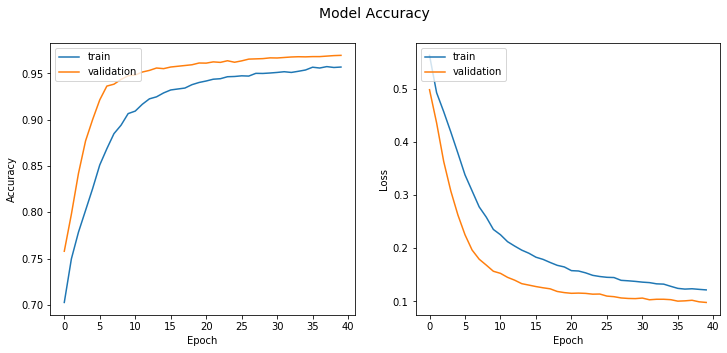

In [78]:
plot_learning_curves(history1)

In [55]:
#define new drop out rates
spatial_dropout = .5
dropout = .5
recurrent_dropout = .2

model2 = create_lstm(spatial_dropout, dropout, recurrent_dropout)

In [56]:
#fit model again
history2 = model2.fit(X_train, y_train, validation_split = .2,
          epochs= 50, batch_size=16)

Train on 5904 samples, validate on 1476 samples
Epoch 1/50
5904/5904 [==============================] - 10s 2ms/step - loss: 0.5832 - accuracy: 0.6834 - val_loss: 0.5514 - val_accuracy: 0.7179
Epoch 2/50
5904/5904 [==============================] - 9s 2ms/step - loss: 0.5356 - accuracy: 0.7279 - val_loss: 0.4888 - val_accuracy: 0.7603
Epoch 3/50
5904/5904 [==============================] - 9s 2ms/step - loss: 0.5081 - accuracy: 0.7415 - val_loss: 0.4397 - val_accuracy: 0.7831
Epoch 4/50
5904/5904 [==============================] - 9s 2ms/step - loss: 0.4927 - accuracy: 0.7550 - val_loss: 0.4131 - val_accuracy: 0.8095
Epoch 5/50
5904/5904 [==============================] - 9s 2ms/step - loss: 0.4751 - accuracy: 0.7625 - val_loss: 0.3806 - val_accuracy: 0.8371
Epoch 6/50
5904/5904 [==============================] - 9s 2ms/step - loss: 0.4575 - accuracy: 0.7778 - val_loss: 0.3520 - val_accuracy: 0.8511
Epoch 7/50
5904/5904 [==============================] - 10s 2ms/step - loss: 0.4388 - a

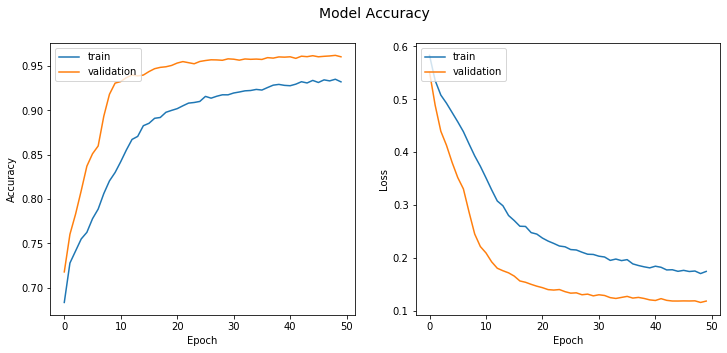

In [57]:
plot_learning_curves(history2)

In [60]:
#define function to create a new network with a LSTM layer and a fully connected secondary hidden layer
def create_lstm_dnn(spatial_dropout, dropout, recurrent_dropout):
    model2 = Sequential()
    model2.add(embedding)
    model2.add(SpatialDropout1D(spatial_dropout))
    model2.add(Bidirectional(LSTM(100, dropout = dropout, recurrent_dropout =recurrent_dropout)))
    model2.add(Dropout(.5))
    model2.add(Dense(EMBEDDING_DIM, activation = 'relu'))
    model2.add(Dense(5, activation = 'sigmoid'))
    
    optimzer = Adam(learning_rate=3e-4)
    model2.compile(loss='binary_crossentropy', optimizer=optimzer, metrics=['accuracy'])
    return model2


In [61]:
#define new drop out rates
spatial_dropout = .5
dropout = .5
recurrent_dropout = .2

model3 = create_lstm_dnn(spatial_dropout, dropout, recurrent_dropout)

In [71]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 100)           462100    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 33, 100)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 505       
Total params: 643,505
Trainable params: 181,405
Non-trainable params: 462,100
__________________________________________

In [62]:
#fit new model
history3 = model3.fit(X_train, y_train, validation_split = .2,
          epochs= 100, batch_size=16)

Train on 5904 samples, validate on 1476 samples
Epoch 1/100
5904/5904 [==============================] - 10s 2ms/step - loss: 0.5983 - accuracy: 0.6573 - val_loss: 0.5686 - val_accuracy: 0.6665
Epoch 2/100
5904/5904 [==============================] - 9s 2ms/step - loss: 0.5579 - accuracy: 0.6988 - val_loss: 0.5217 - val_accuracy: 0.7291
Epoch 3/100
5904/5904 [==============================] - 9s 2ms/step - loss: 0.5330 - accuracy: 0.7164 - val_loss: 0.4759 - val_accuracy: 0.7675
Epoch 4/100
5904/5904 [==============================] - 9s 2ms/step - loss: 0.5155 - accuracy: 0.7305 - val_loss: 0.4568 - val_accuracy: 0.7856
Epoch 5/100
5904/5904 [==============================] - 9s 2ms/step - loss: 0.4991 - accuracy: 0.7442 - val_loss: 0.4102 - val_accuracy: 0.8111
Epoch 6/100
5904/5904 [==============================] - 9s 2ms/step - loss: 0.4827 - accuracy: 0.7580 - val_loss: 0.3931 - val_accuracy: 0.8182
Epoch 7/100
5904/5904 [==============================] - 10s 2ms/step - loss: 0.4

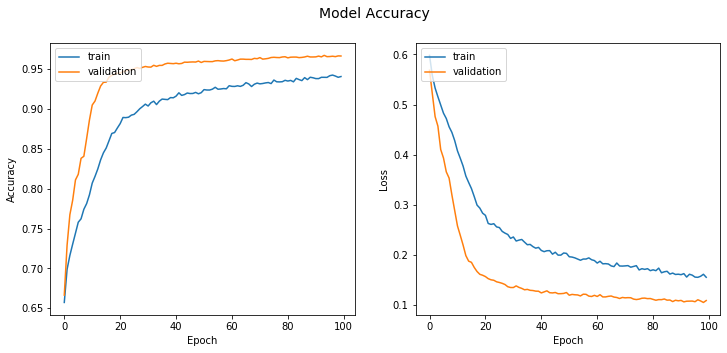

In [63]:
plot_learning_curves(history3)

In [80]:
def predict_submit(model):
    test_yhat = model.predict(X_test, verbose=0)
    test_preds_labels = [[1 if x > 0.5 else 0 for idx, x in enumerate(i)] for i in test_yhat]
    
    submit = pd.DataFrame(test_preds_labels, columns = ['outwear', 'top', 'trousers', 'women dresses', 'women skirts'])
    submit.reset_index(inplace = True)
    submit = submit.rename(columns={'index': 'id'})
    submit.set_index('id', inplace = True)
    return submit

In [66]:
predict_submit(model3)

,outwear,top,trousers,women dresses,women skirts
id,,,,,
0,0,1,1,0,0
1,1,1,0,0,0
2,1,0,1,0,0
3,0,1,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
2455,0,0,1,1,0
2456,1,0,1,0,0
2457,1,0,1,0,0


In [68]:
predict_submit(model1).to_csv('model1_submit.csv') # 0.96666

In [69]:
predict_submit(model2).to_csv('model2_submit.csv') # 0.95528

In [70]:
predict_submit(model3).to_csv('model3_submit.csv') # 0.96422

In [81]:
predict_submit(model1).to_csv('model11_submit.csv') # 0.96585

In [82]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

In [88]:
def create_lstm_custom(spatial_dropout, dropout, recurrent_dropout):
    nn = Sequential()
    
    nn.add(embedding)
    nn.add(SpatialDropout1D(spatial_dropout))
    nn.add(Bidirectional(LSTM(200, dropout = dropout, recurrent_dropout = recurrent_dropout)))
    nn.add(Dropout(.5))
    nn.add(Dense(EMBEDDING_DIM, activation = 'relu'))
    nn.add(Dense(5, activation = 'sigmoid'))
    
    optimzer = Adam(learning_rate=3e-4)
    nn.compile(loss='binary_crossentropy', optimizer=optimzer, metrics=['accuracy'])
    return nn

In [89]:
#define new drop out rates
spatial_dropout = .5
dropout = .5
recurrent_dropout = .2

model4 = create_lstm_custom(spatial_dropout, dropout, recurrent_dropout)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 47, 100)           462100    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 47, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 400)               481600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 984,305
Trainable params: 522,205
Non-trainable params: 462,100
__________________________________________

In [90]:
#fit new model
history4 = model4.fit(X_train, y_train, validation_split = .2, epochs = 100, batch_size = 512, callbacks=[earlystopping, reduce_lr])

Train on 5904 samples, validate on 1476 samples
Epoch 1/100
5904/5904 [==============================] - 14s 2ms/step - loss: 0.6814 - accuracy: 0.5574 - val_loss: 0.6133 - val_accuracy: 0.6547
Epoch 2/100
5904/5904 [==============================] - 13s 2ms/step - loss: 0.6088 - accuracy: 0.6598 - val_loss: 0.6032 - val_accuracy: 0.6546
Epoch 3/100
5904/5904 [==============================] - 13s 2ms/step - loss: 0.5901 - accuracy: 0.6681 - val_loss: 0.5953 - val_accuracy: 0.6600
Epoch 4/100
5904/5904 [==============================] - 14s 2ms/step - loss: 0.5827 - accuracy: 0.6739 - val_loss: 0.5909 - val_accuracy: 0.6634
Epoch 5/100
5904/5904 [==============================] - 13s 2ms/step - loss: 0.5769 - accuracy: 0.6833 - val_loss: 0.5818 - val_accuracy: 0.6844
Epoch 6/100
5904/5904 [==============================] - 14s 2ms/step - loss: 0.5703 - accuracy: 0.6874 - val_loss: 0.5618 - val_accuracy: 0.6976
Epoch 7/100
5904/5904 [==============================] - 14s 2ms/step - loss

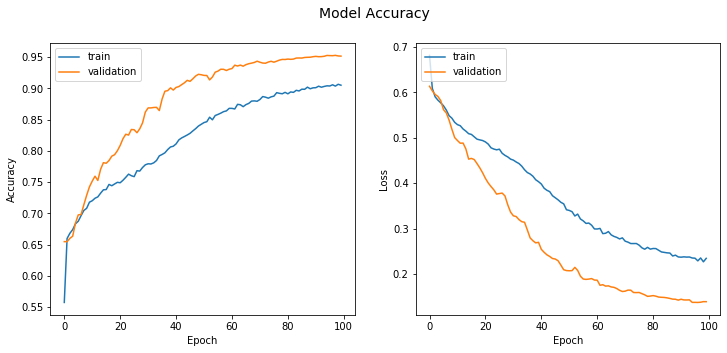

In [91]:
plot_learning_curves(history4)

In [84]:
predict_submit(model4).to_csv('model4_submit.csv') #0.97032

In [87]:
predict_submit(model4).to_csv('model41_submit.csv') #0.96869

In [92]:
predict_submit(model4).to_csv('model42_submit.csv') #0.94796